## Comparing Groups in a Sample: The Central Limit Theorem in Action

For an example of the central limit theorem in action, we can compare the means of two samples, drawn from two populations.  To compare two means, we want to calculate the mean and standard deviation of each sample.  Then, we subtract one mean from the other, and look at the size of the difference in the context of the combined variance of the two samples.  The larger the difference is relative to the variance, the less likely the difference is to be due to random chance, and the more likely it is to reflect meaningful differences between the two populations.

$$\bar y = \bar x_2- \bar x_1$$

To combine the variances, the squared standard deviations are divided by the sample size and summed, then we take the square root of the sum.  This is the standard error of the difference, representing the variance in the sample differences around the population difference, and you can see the formula written below.

$$se=\sqrt{\frac {s_1^2 } n_1 + \frac {s_2^2 } n_2}$$

The difference divided by the standard error is a ratio called the **t-value**.  T-values put the difference in context by telling us how large the difference is relative to the amount of variance, or noise, in the data.  In very noisy data, small differences are more likely to result from the noise rather than from real differences between the population means.

$$t-value=\frac{\bar y}{se}$$

Given a t-value, we can calculate the probability that a t-value at least this extreme would occur by chance, called a **p-value**.  This tells us how likely it is that we would get the sampling data we observe if the two population means were not, in fact, different from one another.
The p-value runs between 0 (It is impossible to get a difference of this size or greater in the absence of a real population difference) and 1 (we will always get a difference of this size or greater in the absence of a real population difference).  The lower the p-value, the more confidently we can conclude that there is a meaningful difference between the means of the two groups in the population.

Let’s spin up some population data and give this a try. We’ll make two variables to represent two different populations: one a binomially distributed variable with p of 0.2, n=10, and 10000 datapoints (`group1`), and another binomially distributed variable with p of 0.5, n=10, and 10000 datapoints (`group2`). The true population difference between the two populations is 0.3.


In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

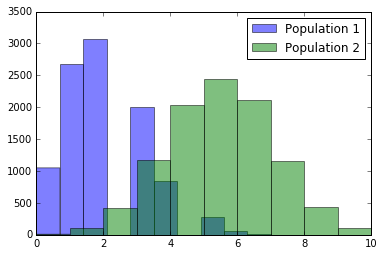

In [2]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

The populations are not normal. Next, take a sample of 100 from each population and plot them.

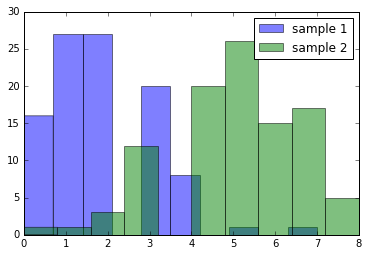

In [3]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

Next, compute the means  and standard deviations for each group.  Note that the mean represents `n * p`: the probability of an event occurring (`p`) multiplied by the number of repetitions (`n`).  To get p for each sample, divide by `n`, which we set to 10 when generating the populations.

In [4]:
print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

# Compute the difference between the two sample means.
diff=sample2.mean( ) -sample1.mean()
print(diff)

1.85
5.02
1.32193040664
1.62468458477
3.17


Next, calculate the standard error of the sampling distribution of the difference of the means.  First, create an array with the size of each variable and another with the standard deviation of each variable.  In this case, the sizes are already known since you provided them earlier, but let’s calculate them anyway.

In [5]:
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print(diff/diff_se)

15.1345842493


Finally, we import the function `ttest_ind` from scipy.stats, which calculates the t-value for us (called “statistic”) and also provides the probability calculation (called “pvalue”).  The t-value we calculated and the t-value given by the function may differ slightly after the hundredth decimal place.  This is due to differences of rounding caused by our multiple-step approach to calculating the t-value.  

In [6]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=15.058721193921539, pvalue=2.9983456846787284e-34)


The t-value scales the difference between the two groups by the amount of variance in the two samples.  High variability in samples can lead to groups with means that look very different, but when we look at the histogram we see that most of the values in the sample groups overlap.  The groups are so variable that the distribution of values is quite broad.  For example, Olympic races are split into men’s races and women’s races because men are, on average, faster than women.  However, looking at [the distribution of running speed in the New York marathon](http://www.warandgender.com/wggendif.htm), where women and men run together, it’s clear that running speed has a high degree of variability, and that the distributions for men and women overlap a great deal.  

One way to interpret a t-value is as the number of standard errors worth of space separating the group means.  A t-value of 2 would indicate that the means are two standard errors apart.

The p-value associated with a t-test indicates the likelihood of getting a difference this large or larger in the samples if the populations were not different.  The smaller the p-value, the more likely the difference we see in the samples meaningfully reflects the populations.  The p-value in the test you did above is really small, so we can be fairly confident that the difference in means we see is due to a real difference in the population and not due to variability in the samples.